## User Story:
The IT department of _**Plain Corp**_ has implemented a custom-built _Computer Management Solution (CMS)_ which comes with a feature that reports information about computers in their environment such as metadata, installed programs and logins. The current problem faced by the IT team is that the reports created by CMS do not answer all the questions they have about the computers in their environment. Luckily, they figured out that the CMS stores its raw data in a SQLite (v3.45.0)  _database (DB)_ file and that they could write custom SQL queries to report the information not provided within the CMS reports.

## Goal:
Your job will be to update this Jupyter Notebook with the SQL queries needed to meet the IT team’s reporting needs. It is recommended to use a Database IDE to help with query writing and data exploration.

## Directions:
Download the attached zip file which contains all the files you need to complete this assignment. Below is a description of each of the three files within the attached zip file:
- **cms.sqlite**: The database you must query from to complete this assignment.
- **cms_data_dictionary.txt**: A data dictionary describing the tables within this database.
- **GA Mission - Data Analyst.ipynb**: The Jupyter Notebook file you must update to complete the assignment. Rules to abide by while completing this assignment are listed within this Jupyter Notebook.

## Our Expectations
This assignment <ins>**should take you no longer than 2 hours**</ins> to complete. Make sure your outputs are visible in a web browser when uploaded to a public repository and that they are presented in a way that is understandable by someone with some technical experience but no programming experience. Extra rules to abide by are described in the included Juptyter Notebook file.

We would prefer that you share the code with us by pushing it to a public repository in the hosting provider of your choosing. If you do not want to upload it to a public repository then you can zip up the repository folder on your machine and send it to us via email. If you go that route, please make sure that the .git folder is included.

We recommend  that you use a Database IDE (e.g., DBeaver, Datagrip, etc.) to assist with query writing and data exploration. If you have any questions, please contact us and we will do our best to clarify anything that is unclear.

## Rules:
- The code should be stored in a git repository.
- With the exception of ***Pandas***, you can use any Python Packages you like.
- Do not edit the data in the **cms.sqlite** DB file.
- Your query results must be output in a _Pandas DataFrame (PD)_.
- Questions 4 and 5 are written answer questions where no code or SQL is necessary.
- Question 6 is a written answer question that may require code or SQL depending on your answer. This question can be thought of as a chance to share any observations you've made or perform a light EDA on the data. There are no right or wrong answers for this question.

# Questions

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect('cms.sqlite')

 <font size='5'> 1. Count how many Admin and Regular computers are in the database.</font>

In [2]:
admin_query = '''
select count(computer_name) as admin_count
from computers
where computer_type = 'Admin';
'''
num_admin_df = pd.read_sql_query(admin_query, con)
print('The number of admins: ', num_admin_df.admin_count.values[0])

regular_query = '''
select count(computer_name) as regular_count
from computers
where computer_type = 'Regular';
'''
num_regular_df = pd.read_sql_query(regular_query, con)
print('The number of regular computers: ', num_regular_df.regular_count.values[0])

The number of admins:  8
The number of regular computers:  24


<font size='5'>2a. Identify all non-admin computers with the programs **Bitwarden**, **Quickpass** or **1password** installed, please note that the listed program names may not match exactly to the program names in the database. Be sure to include the computer names, operating system, program names and program version in the PD output.</font>

In [3]:
query = '''
select computers.computer_name, operating_system, program_name, program_version
from installed_programs left join computers on installed_programs.computer_name = computers.computer_name 
where computer_type != 'Admin' and (
program_name like '%bitwarden%'
or program_name like '%quickpass%'
or program_name like '%1password'
);
'''
pass_df = pd.read_sql_query(query, con)
print(pass_df)

       computer_name                            operating_system  \
0    DESKTOP-O23A1M7                    Microsoft Windows 11 Pro   
1    DESKTOP-O23A1M7                    Microsoft Windows 11 Pro   
2    DESKTOP-O23A1M7                    Microsoft Windows 11 Pro   
3    DESKTOP-O23A1M7                    Microsoft Windows 11 Pro   
4    DESKTOP-O23A1M7                    Microsoft Windows 11 Pro   
5    DESKTOP-O23A1M7                    Microsoft Windows 11 Pro   
6    LAPTOP-55433J3D               Microsoft Windows 11 Business   
7    LAPTOP-55433J3D               Microsoft Windows 11 Business   
8     PLAINCORP-1012                    Microsoft Windows 11 Pro   
9     PLAINCORP-1014               Microsoft Windows 11 Business   
10    PLAINCORP-1014               Microsoft Windows 11 Business   
11    PLAINCORP-1014               Microsoft Windows 11 Business   
12   PLAINCORP-DRAKE                    Microsoft Windows 11 Pro   
13   PLAINCORP-DRAKE                    Microsof

<font size='5'>2b. Report the latest version of each program and how many computers have said programs installed.</font>

In [4]:
query = '''
select program_name, program_version as max_version, count(program_version) as count
from installed_programs
group by program_name
having program_version = max(program_version);
'''

latest_version_df = pd.read_sql_query(query, con)
print(latest_version_df)

                            program_name     max_version  count
0            /Applications/Bitwarden.app        2023.1.1      3
1              /Applications/Firefox.app         114.0.1      2
2       /Applications/GitHub Desktop.app           3.3.3      2
3        /Applications/Google Chrome.app  117.0.5938.149      2
4    /Applications/JetBrains Toolbox.app    1.27.2.13801      2
..                                   ...             ...    ...
598                 vs_minshellsharedmsi      17.8.34205     11
599                    vs_minshellx64msi      17.8.34205     11
600                           vs_tipsmsi      17.8.34129     12
601          vs_vswebprotocolselectormsi      17.8.34129      9
602                 windows_toolscorepkg      17.6.33605      9

[603 rows x 3 columns]


<font size='5'> 2c. Report each program and the ratio of which computers out of all computers have said programs installed. Express the ratio in the format of “**X** out of **Y**“ computers and as a percentage rounded to the 2nd. Hint: To calculate the percentage, you will have to cast one of the numbers to a decimal by multiplying them by **1.0**.</font>

In [5]:
query = '''
select program_name, count(program_version) || ' of ' ||
(select count(*) from computers) as ratio,
round(count(program_version)/((select count(*) from computers)*1.0), 2) as percentage
from installed_programs
group by program_name
order by percentage;
'''
install_df = pd.read_sql_query(query, con)
print(install_df)

                                      program_name     ratio  percentage
0             /Applications/Splashtop Streamer.app   1 of 38        0.03
1                        7-Zip 22.01 (x64 edition)   1 of 38        0.03
2                           API Monitor v2 (Alpha)   1 of 38        0.03
3    AdoptOpenJDK JRE with Hotspot 11.0.7.10 (x64)   1 of 38        0.03
4                            Amazon Corretto (x64)   1 of 38        0.03
..                                             ...       ...         ...
598     Office 16 Click-to-Run Licensing Component  25 of 38        0.66
599    Visual C++ Library CRT Desktop Appx Package  27 of 38        0.71
600                                Microsoft Teams  30 of 38        0.79
601                                         HOTKEY  35 of 38        0.92
602                  Microsoft Update Health Tools  35 of 38        0.92

[603 rows x 3 columns]


<font size='5'>3a. Report which admin computers have logins on or later than May 2023, have **Python** installed on their computers and whose IP addresses are not in the IP whitelist table. Be sure to include the computer name, IP address and login timestamp; order the results by most recent date and computer name.</font>

In [6]:
query = '''
select login_records.computer_name, login_ip, login_timestamp
from login_records left join computers on login_records.computer_name = computers.computer_name 
left join installed_programs on login_records.computer_name = installed_programs.computer_name 
where computers.computer_type = 'Admin'
and program_name like '%python%'
and substr(login_timestamp, 0, 5) || substr(login_timestamp, 6, 2) || substr(login_timestamp, 9, 2) >= '20230501'
and login_ip not in (select login_ip from ip_whitelist)
order by login_timestamp desc,
login_records.computer_name;
'''

unauthorized_login_df = pd.read_sql_query(query, con)
print(unauthorized_login_df)

      computer_name       login_ip      login_timestamp
0      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
1      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
2      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
3      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
4      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
5      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
6      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
7      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
8      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
9      PLAINCORP-13  73.18.119.169  2023-07-19 15:56:48
10     PLAINCORP-13  73.18.119.169  2023-07-19 15:56:45
11     PLAINCORP-13  73.18.119.169  2023-07-19 15:56:45
12     PLAINCORP-13  73.18.119.169  2023-07-19 15:56:45
13     PLAINCORP-13  73.18.119.169  2023-07-19 15:56:45
14     PLAINCORP-13  73.18.119.169  2023-07-19 15:56:45
15     PLAINCORP-13  73.18.119.169  2023-07-19 15:56:45
16     PLAINCORP-13  73.18.119.169  2023-07-19 1

<font size='5'>3b. Below are the requirements for the modifications you should make to the PD output from **3a**, you cannot change the SQL query to meet these requirements:</font>
- <font size='5'>Replace the 2nd and 4th octets of the IP address with **\*** (e.g., 10.\*.0.\*). Your solution must use regex.</font>
- <font size='5'>Format the login timestamp as the date only (e.g., 01/20/2024)</font>


In [7]:
unauthorized_login_df['login_ip'] = unauthorized_login_df.login_ip.str.replace(r'(\d+)\.(\d+)\.(\d+)\.(\d+)', r'\1.*.\3.*', regex=True)
unauthorized_login_df['login_timestamp'] = pd.to_datetime(unauthorized_login_df.login_timestamp)
unauthorized_login_df['login_timestamp'] = unauthorized_login_df['login_timestamp'].dt.strftime('%m/%d/%Y')
print(unauthorized_login_df)

      computer_name    login_ip login_timestamp
0      PLAINCORP-13  73.*.119.*      07/19/2023
1      PLAINCORP-13  73.*.119.*      07/19/2023
2      PLAINCORP-13  73.*.119.*      07/19/2023
3      PLAINCORP-13  73.*.119.*      07/19/2023
4      PLAINCORP-13  73.*.119.*      07/19/2023
5      PLAINCORP-13  73.*.119.*      07/19/2023
6      PLAINCORP-13  73.*.119.*      07/19/2023
7      PLAINCORP-13  73.*.119.*      07/19/2023
8      PLAINCORP-13  73.*.119.*      07/19/2023
9      PLAINCORP-13  73.*.119.*      07/19/2023
10     PLAINCORP-13  73.*.119.*      07/19/2023
11     PLAINCORP-13  73.*.119.*      07/19/2023
12     PLAINCORP-13  73.*.119.*      07/19/2023
13     PLAINCORP-13  73.*.119.*      07/19/2023
14     PLAINCORP-13  73.*.119.*      07/19/2023
15     PLAINCORP-13  73.*.119.*      07/19/2023
16     PLAINCORP-13  73.*.119.*      07/19/2023
17     PLAINCORP-13  73.*.119.*      07/19/2023
18     PLAINCORP-13  73.*.119.*      07/19/2023
19     PLAINCORP-13  73.*.119.*      07/

<font size='5'>4. Bob from the IT department noticed a SQL query was starting to get slow and since he knew a little bit of SQL from college, he decided to fix the query himself. The first thing Bob did was to reduce the number of unnecessary joins in the query, but the new query was still slow. Was Bob’s initial approach the correct one? If so, explain Bob's next steps? If not, explain what Bob should've done instead?</font>

<p>Bob's initial approach is a good start. Some next steps to perform would be
<ol>
<li>Check if the query contains any correlated subqueries, and potentially attempting to do the query without them.</li>
<li>Remove any unnecessary columns from select statements.</li>
<li>Optimize character matching (i.e. avoid %foo% if you know where foo occurs in string).</li>
<li>Check if the schema and indices can be optimized.</li>
<li>Denormalize the tables if possible if the performance is still bad</li>
</ol>
</p>

<font size='5'>5. To improve the CMS’s backend and report capabilities, the IT department wants to provide feedback to the contractor who built the CMS solution and wants your input.  How would you improve or change the data model? If you decide to create a data diagram you must save it as a PDF file in the same folder as this Jupyter Notebook.</font>

<p> I would keep the data diagram the same, and add indices to commonly matched against columns</p>

<font size='5'>6. Did you notice anything interesting or anything wrong with the data? If so, please describe what you found and if possible, provide any related evidence.</font>

<p>I found the following things interesting:</p>
<ol>
    <li>There are two computers with admin rights whose IP addresses aren't in the whitelist, yet they are admins adn apparently kept loggin in and out. The dataframe in 3a shows this.</li>
    <li>See below analysis for more.</li>
</ol>

<h3>Distribution of Number of Programs Per Computers</h3>

<p>DESKTOP-O23A1M7 and TP-6806 have a large amount of programs installed on them compared to other computers.</p>

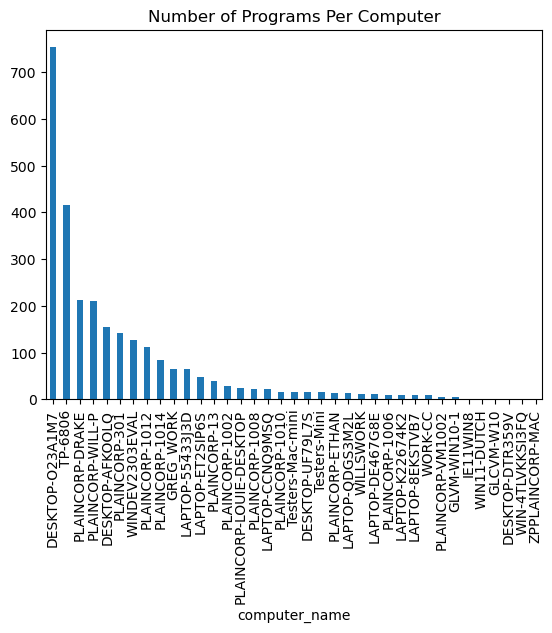

In [8]:
query = '''
select computer_name, program_name
from installed_programs
'''
df = pd.read_sql_query(query, con)
df['computer_name'].value_counts().plot(kind='bar', title='Number of Programs Per Computer');

<h3>Distribution of Logins Per Computer</h3>

<p>The number of logins for each computer is relatively small for the time range we have.</p>

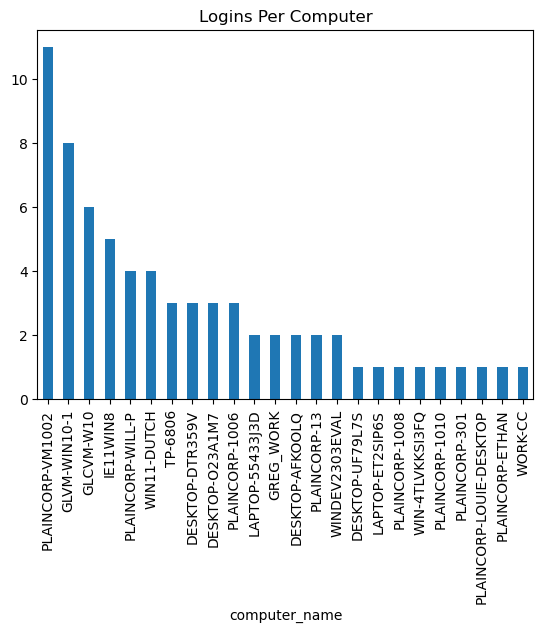

In [9]:
query = '''
select computer_name
from login_records
'''
df = pd.read_sql_query(query, con)
df['computer_name'].value_counts().plot(kind='bar', title='Logins Per Computer');

In [10]:
con.close()